In [2]:
import numpy as np 
import pandas as pd

from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist

import string

from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import neattext.functions as nfx

from textblob import TextBlob as tb
from textblob import Word

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

In [3]:

march=pd.read_csv('01_PREPROCESSED_MARCH.csv')

In [4]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt','lt','dos','say']

In [5]:
for i in range(0,2452):
    march['clean_tweet'][i]= ''.join([i for i in march['clean_tweet'][i] if not i.isdigit()])
    march['clean_tweet'][i]=march['clean_tweet'][i].lower()
    march['clean_tweet'][i]=nfx.remove_custom_words(march['clean_tweet'][i],custom_words)

In [6]:
march['tokenized_Tweet']=np.nan

In [7]:
def tokenizing_march(text,i=0):
    text=tb(text)
    token_text=text.words
    token_text
    march['tokenized_Tweet'][i]=token_text

In [8]:
for i in range(0,2452):
    text=march['clean_tweet'][i]
    tokenizing_march(text,i)

In [9]:
march['filteredToken']=np.nan

In [10]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','%','.','the','etc','pls','btw','let','hgd','dos','say'])

In [11]:
stop = set(stop_words)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [12]:
def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [13]:
march['filteredToken']=march['clean_tweet'].apply(clean)

In [14]:
tweets_march=march['clean_tweet']

In [15]:
tweet_list_march = tweets_march.apply(nfx.remove_stopwords)
tweet_list_march = tweet_list_march .apply(nfx.remove_special_characters)
tweet_list_march = tweet_list_march.apply(nfx.remove_punctuations)

In [16]:
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def remove_dual_char(list):
    for token in list:
        if( len(token)==2):
            list.remove(token)
def remove_custom_words(list,c_list):
        for token in list:
            for c_word in c_list:
                if( c_word==token):
                    list.remove(token)
                else:
                    pass

In [17]:
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   

In [18]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt','lt','hrs','dos','say']

In [19]:
def Convert_list(string):
    li = list(string.split(" "))
    return li

In [20]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [21]:
for i in range(0,2452):
    ls=Convert_list(tweet_list_march[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_march[i]=listToString(ls)

In [22]:
def my_lemma_march(token,i=0):
    word=tb(token)
    tags=word.tags
    sample=Word(tags[0][0])
    if tags[0][1][0] =='V':
        x=sample.lemmatize('v')
        ls[i]=x
    else:
        x=sample.lemmatize()
        ls[i]=x

In [23]:
for i in range(0,2452):
    ls=Convert_list(tweet_list_march[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
                continue
        word=tb(text)
        tags=word.tags
        sample=Word(tags[0][0])
        if tags[0][1][0] =='V':
                x=sample.lemmatize('v')
                ls[j]=x
        else:
                x=sample.lemmatize()
                ls[j]=x

In [24]:
for i in range(0,2452):
    ls=Convert_list(tweet_list_march[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
            continue
        my_lemma_march(text,j)
    tweet_list_march[i]=listToString(ls)

In [25]:
for i in range(0,2452):
    ls=Convert_list(tweet_list_march[i])
    ls=remove_words(ls,custom_words)
    tweet_list_march[i]=listToString(ls)

In [26]:
march['clean_tweet']=tweet_list_march

In [27]:
march=march.drop(2451)

In [28]:
tweet_list_march=march['clean_tweet']
ps=PorterStemmer()
for i in range(0,march.shape[0]):
    ls=march['clean_tweet'][i]
    words = word_tokenize(ls)
    st=""
    for w in words:
        w=ps.stem(w)
        st+=w+' '
    march['clean_tweet'][i]=st
for i in range(0,march.shape[0]):
    ls=Convert_list(tweet_list_march[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_march[i]=listToString(ls)
march['clean_tweet']=tweet_list_march

In [47]:
def generate_ngrams(text, WordsToCombine):
     words = text.split()
     output = []  
     for i in range(len(words)- WordsToCombine+1):
         output.append(words[i:i+WordsToCombine])
     return output

In [48]:
march['clean_tweet'][0]

'germani covid respons envi world daili remind world mean white peopl '

In [49]:
generate_ngrams(march['clean_tweet'][0],2)

[['germani', 'covid'],
 ['covid', 'respons'],
 ['respons', 'envi'],
 ['envi', 'world'],
 ['world', 'daili'],
 ['daili', 'remind'],
 ['remind', 'world'],
 ['world', 'mean'],
 ['mean', 'white'],
 ['white', 'peopl']]

In [50]:
march['clean_tweet']

0       germani covid respons envi world daili remind ...
1       pfizer moderna claim vaccin safe effect estim ...
2       recent publish predictor hospit older adult co...
3            dey covid test privat clinic govt free stop 
4       time tell far base data million peopl vaccin w...
                              ...                        
2446                                               repli 
2447    guy control covid state coronarastra maharastr...
2448    barasat hospit covid vaccin give peopl sit vac...
2449                                               repli 
2450    dear sir request allow vaccin covid patient mo...
Name: clean_tweet, Length: 2451, dtype: object

# ---K-Means---

In [29]:
data =march['clean_tweet']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [30]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

,aaah,aachal,aah,aaj,aam,aameeen,aameen,aap,aapko,aarha,...,zero,zggg,zia,zilha,zimbabw,zlem,zonal,zone,zoo,zydu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


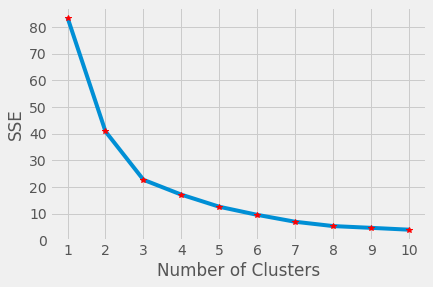

In [31]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans_kwargs = {"init": "k-means++","n_init": 2,"max_iter": 1000,"random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Y_sklearn)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.plot(range(1, 11), sse,'r*')
plt.xticks(range(1, 11))
plt.yticks(range(0,90,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7825513013473413
For n_clusters = 3 The average silhouette_score is : 0.5905938150475658
For n_clusters = 4 The average silhouette_score is : 0.6065021892469854
For n_clusters = 5 The average silhouette_score is : 0.5864497524251101
For n_clusters = 6 The average silhouette_score is : 0.41057237960213294
For n_clusters = 7 The average silhouette_score is : 0.4573971336999123
For n_clusters = 8 The average silhouette_score is : 0.44621221222926544
For n_clusters = 9 The average silhouette_score is : 0.47223586674158813
For n_clusters = 10 The average silhouette_score is : 0.4616983552600016


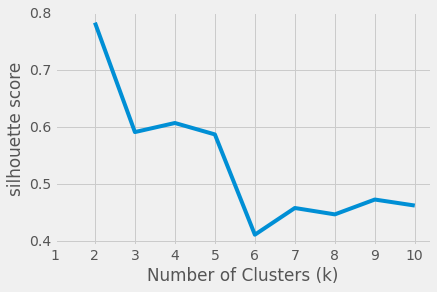

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(Y_sklearn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_sklearn, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_sklearn, cluster_labels)
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.xticks(range(1, 11))
plt.show()

Text(0, 0.5, 'Feature space for the 2nd feature')

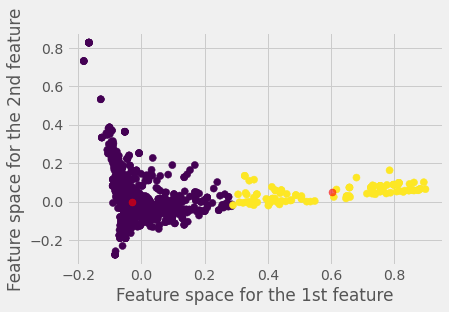

In [33]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=2, max_iter=600,n_init=1, algorithm = 'auto',random_state=1)
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

centers = fitted.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50, alpha=0.6);
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")

In [34]:
label=kmeans.labels_
march['label']=label
march.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,label
0,"Germany's Covid response ""was the envy of the ...",germani covid respons envi world daili remind ...,[],['@GoogleNews'],['https://t.co/dxbkOVjBCZ'],[],"[germanys, covid, response, was, envy, of, wor...","[germany, covid, response, envy, world, daily,...",0
1,Pfizer &amp; Moderna claim their vaccines very...,pfizer moderna claim vaccin safe effect estim ...,[],[],['https://t.co/OR1QmkkBS3'],"['🙄', '🤔', '❓', '⏩', '❓']","[pfizer, moderna, claim, their, vaccines, very...","[pfizer, moderna, claim, vaccine, safe, effect...",0
2,We recently published the predictors of hospit...,recent publish predictor hospit older adult co...,"['#COVID19', '#CoronaVirusUpdates', '#geriatri...",[],['https://t.co/GghAqZSs9t'],[],"[we, recently, published, predictors, of, hosp...","[recently, published, predictor, hospitalizati...",0


In [35]:
np.unique(march['label'])

array([0, 1])

In [36]:
march['label'].value_counts()

0    2339
1     112
Name: label, dtype: int64

In [37]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 10)

In [38]:
March_cluster=dfs

In [39]:
March_cluster[0].head(10)

,features,score
0,covid,0.054923
1,vaccin,0.046641
2,corona,0.026874
3,case,0.015734
4,india,0.015544
5,curfew,0.014458
6,peopl,0.014433
7,coronaviru,0.013344
8,posit,0.012455
9,viru,0.012084


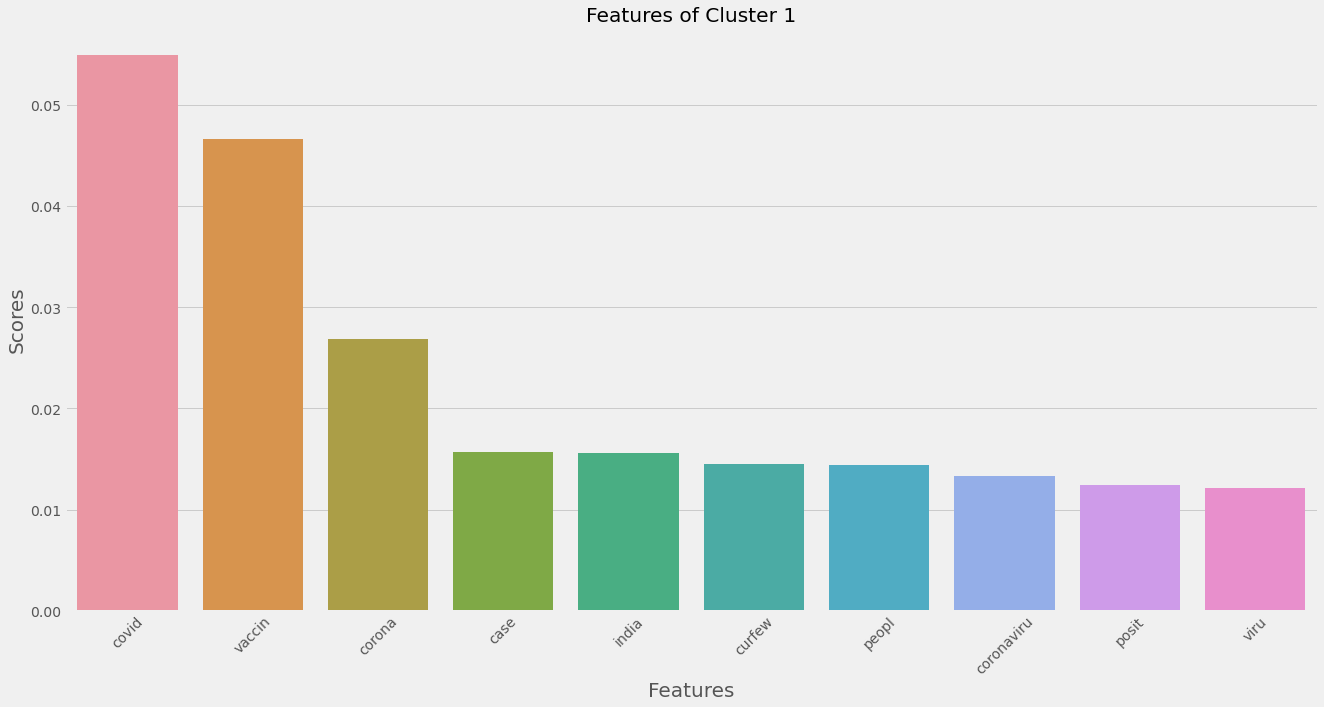

In [40]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=March_cluster[0]).set(title="Features of Cluster 1")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

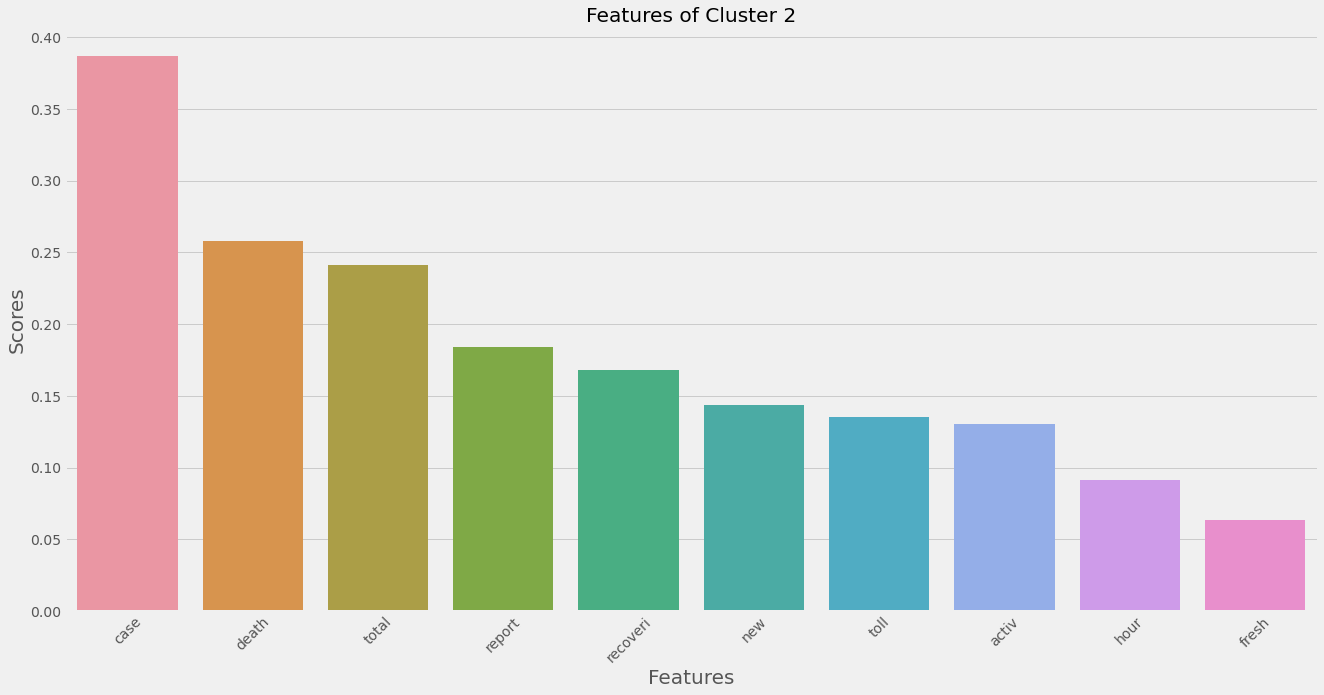

In [41]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=March_cluster[1]).set(title="Features of Cluster 2")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

In [42]:
labels = np.unique(prediction)
dfs1 = []
for label in labels:
    id_temp = np.where(prediction==label) 
    x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    sorted_means = np.argsort(x_means)[::-1]
    features = tf_idf_vectorizor.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    dfs1.append(df)

In [43]:
dfs1[0]

,features,score
0,covid,0.054923
1,vaccin,0.046641
2,corona,0.026874
3,case,0.015734
4,india,0.015544
...,...,...
4889,chandigarh,0.000000
4890,bluru,0.000000
4891,dharwad,0.000000
4892,curedrecov,0.000000


In [44]:
dfs1[1]

,features,score
0,case,0.386995
1,death,0.257631
2,total,0.240878
3,report,0.183930
4,recoveri,0.168265
...,...,...
4889,philippin,0.000000
4890,phir,0.000000
4891,phoenix,0.000000
4892,photo,0.000000


In [45]:
# K3=dfs1[2]
K1=dfs1[0]
K2=dfs1[1]

In [46]:
march_bw=pd.read_csv('MarchTopWords.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'MarchTopWords.csv'

In [ ]:
t=march_bw[:30]


In [ ]:
c1=[]
p=0
c2=[]
q=0
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K1['features'][j]):
            c1.append(K1['features'][j])
            p=p+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K2['features'][j]):
            c2.append(K1['features'][j])
            q=q+1


In [ ]:

print(p)
print(q)

28
20


In [ ]:
K1.to_csv('MarchCluster1.csv')

### Tweet Grouping

In [ ]:
label=kmeans.labels_
march['label']=label
march.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,label
0,"Germany's Covid response ""was the envy of the ...",germani covid respons envi world daili remind ...,[],['@GoogleNews'],['https://t.co/dxbkOVjBCZ'],[],"[germanys, covid, response, was, envy, of, wor...","[germany, covid, response, envy, world, daily,...",0
1,Pfizer &amp; Moderna claim their vaccines very...,pfizer moderna claim vaccin safe effect estim ...,[],[],['https://t.co/OR1QmkkBS3'],"['🙄', '🤔', '❓', '⏩', '❓']","[pfizer, moderna, claim, their, vaccines, very...","[pfizer, moderna, claim, vaccine, safe, effect...",0
2,We recently published the predictors of hospit...,recent publish predictor hospit older adult co...,"['#COVID19', '#CoronaVirusUpdates', '#geriatri...",[],['https://t.co/GghAqZSs9t'],[],"[we, recently, published, predictors, of, hosp...","[recently, published, predictor, hospitalizati...",0


In [ ]:
np.unique(march['label'])

array([0, 1])

In [ ]:
march['label'].value_counts()

0    2339
1     112
Name: label, dtype: int64

In [ ]:
march.to_csv('MarchClusterTweet.csv')

In [ ]:
march_cluster_1=march[march.label ==0]
march_cluster_2=march[march.label ==1]

In [ ]:
march_cluster_1.head(5)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,label
0,"Germany's Covid response ""was the envy of the ...",germani covid respons envi world daili remind ...,[],['@GoogleNews'],['https://t.co/dxbkOVjBCZ'],[],"[germanys, covid, response, was, envy, of, wor...","[germany, covid, response, envy, world, daily,...",0
1,Pfizer &amp; Moderna claim their vaccines very...,pfizer moderna claim vaccin safe effect estim ...,[],[],['https://t.co/OR1QmkkBS3'],"['🙄', '🤔', '❓', '⏩', '❓']","[pfizer, moderna, claim, their, vaccines, very...","[pfizer, moderna, claim, vaccine, safe, effect...",0
2,We recently published the predictors of hospit...,recent publish predictor hospit older adult co...,"['#COVID19', '#CoronaVirusUpdates', '#geriatri...",[],['https://t.co/GghAqZSs9t'],[],"[we, recently, published, predictors, of, hosp...","[recently, published, predictor, hospitalizati...",0
3,@Alhamdhulillaah Them dey do Covid test 150AED...,dey covid test privat clinic govt free stop,[],['@Alhamdhulillaah'],[],[],"[them, dey, covid, test, aed, private, clinics...","[dey, covid, test, aed, private, clinic, govt,...",0
4,@YMasannat @VGDakessian Time will tell! So far...,time tell far base data million peopl vaccin w...,[],"['@YMasannat', '@VGDakessian']","['https://t.co/S8oth5jEEW', 'https://t.co/1Gjr...",[],"[time, will, tell, so, far, and, based, on, da...","[time, tell, far, based, data, million, people...",0


In [ ]:
march_cluster_2.head(5)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,label
63,"""Over 85% of new COVID-19 cases are from six s...",new covid case state india,[],[],['https://t.co/h0Jyzm4JHm'],[],"[over, of, new, covid, cases, are, six, states...","[new, covid, case, six, state, across, india]",1
81,04.02.2021 Recently #Covid_19+ve cases in Indi...,recent case india show declin trendris case to...,['#Covid_19+ve'],[],[],[],"[recently, cases, in, india, is, showing, decl...","[recently, case, india, showing, declining, tr...",1
98,06.02.2021 Recently #Covid_19+ve cases in Indi...,recent case india show declin trendbut rise ca...,['#Covid_19+ve'],[],[],[],"[recently, cases, in, india, is, showing, decl...","[recently, case, india, showing, declining, tr...",1
102,Karnataka had a total of 580 fresh #Covid_19 c...,karnataka total fresh case death saturday beng...,['#Covid_19'],"['@ChitraSundaram7', '@scooban', '@Amit_A_Tiwa...",[],[],"[karnataka, had, a, total, of, fresh, cases, d...","[karnataka, total, fresh, case, death, saturda...",1
126,Rajasthan reports 233 new COVID-19 cases and 1...,rajasthan report new covid case recoveri hour ...,[],[],['https://t.co/fDHbJ9h8GH'],[],"[rajasthan, reports, new, covid, cases, and, r...","[rajasthan, report, new, covid, case, recovery...",1


In [ ]:
march_cluster_1.to_csv('MarchCluster1Tweet.csv')
march_cluster_2.to_csv('MarchCluster2Tweet.csv')

In [ ]:
count=march['label'].value_counts()

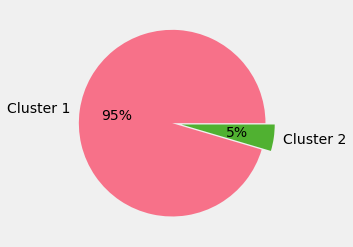

In [ ]:
count=march['label'].value_counts()
tweet_freq_cluster=[]
tweet_freq_cluster.append(count[0])
tweet_freq_cluster.append(count[1])
cluster_name=['Cluster 1','Cluster 2']
explode = [0, 0.1]
palette_color = sns.color_palette("husl", 3)
  
# plotting data on chart
plt.pie(tweet_freq_cluster, labels=cluster_name, colors=palette_color,   explode=explode,autopct='%.0f%%')
  
# displaying chart
plt.show()

In [ ]:
march['tweet'][102]

'Karnataka had a total of 580 fresh #Covid_19 cases &amp; 5 deaths on Saturday. Bengaluru had 367 new  cases &amp; 3 deaths. Total tests 82229 +vty rate 0.70%. Overall covid deaths in State so far: 12359 Blr: 4496  @ChitraSundaram7 @scooban @Amit_A_Tiwari @dr_asr @SunithaNahar @sun_usind'